In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13288.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/24201.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26556.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26076.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27577.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27973.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26452.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/10162.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12768.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12551.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13205.jpg
/kaggle/input/face-expression-recognition-d

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Preparing Data

In [3]:
train_path = "/kaggle/input/face-expression-recognition-dataset/images/train"
validation_path = "/kaggle/input/face-expression-recognition-dataset/images/validation"

In [4]:
angry_train = os.path.join(train_path,'angry')
disgust_train = os.path.join(train_path,'disgust')
fear_train = os.path.join(train_path,'fear')
happy_train = os.path.join(train_path,'happy')
neutral_train = os.path.join(train_path,'neutral')
sad_train = os.path.join(train_path,'sad')
surprise_train = os.path.join(train_path,'surprise')

In [5]:
print(f"angry training images : {len(os.listdir(angry_train))}")
print(f"disgust training images : {len(os.listdir(disgust_train))}")
print(f"fear training images : {len(os.listdir(fear_train))}")
print(f"happy training images : {len(os.listdir(happy_train))}")
print(f"neutral training images : {len(os.listdir(neutral_train))}")
print(f"sad training images : {len(os.listdir(sad_train))}")
print(f"surprise training images : {len(os.listdir(surprise_train))}")

angry training images : 3993
disgust training images : 436
fear training images : 4103
happy training images : 7164
neutral training images : 4982
sad training images : 4938
surprise training images : 3205


# Displaying Images

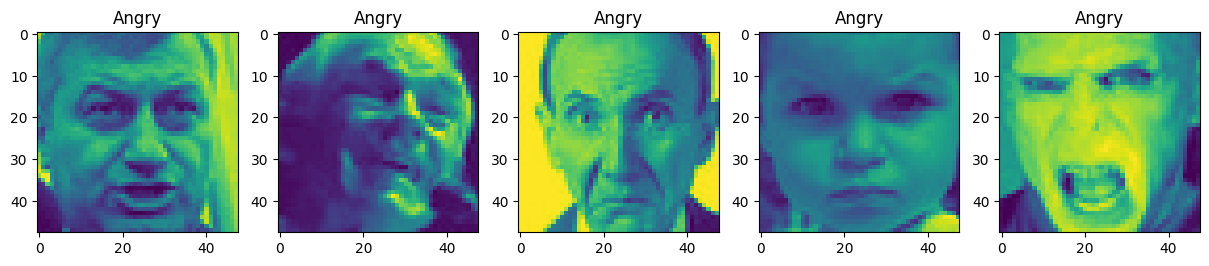

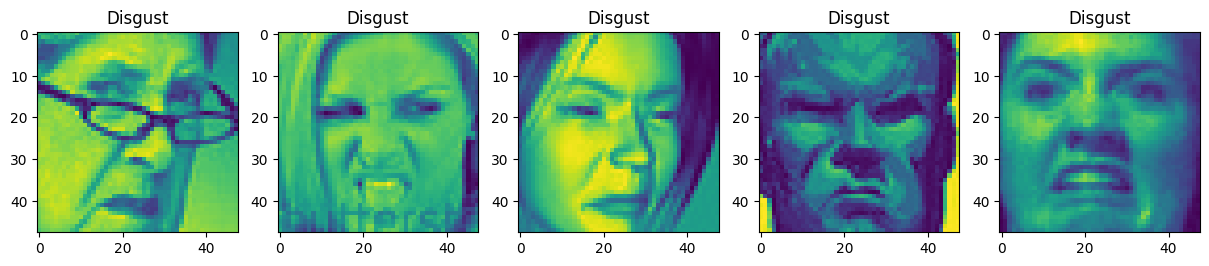

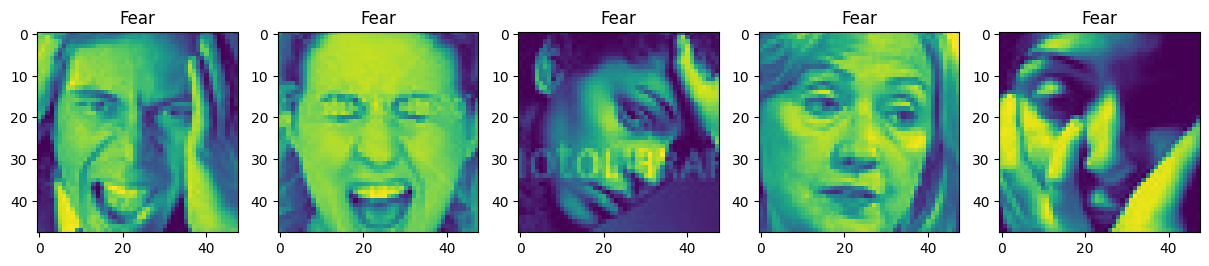

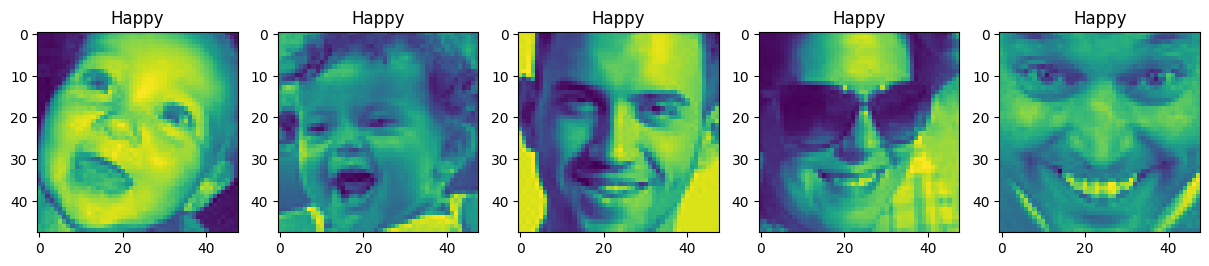

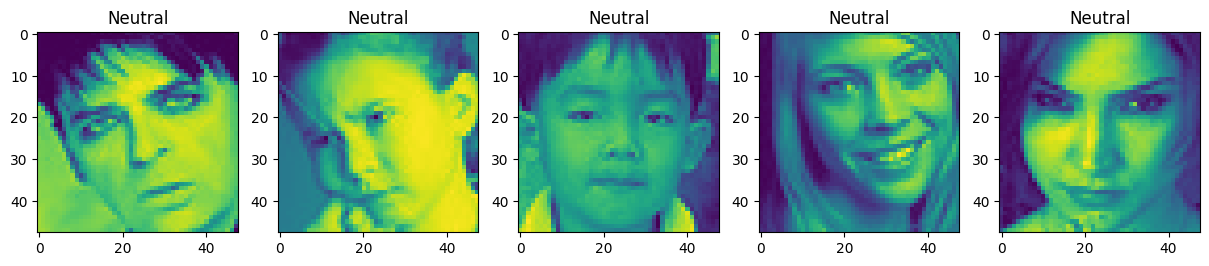

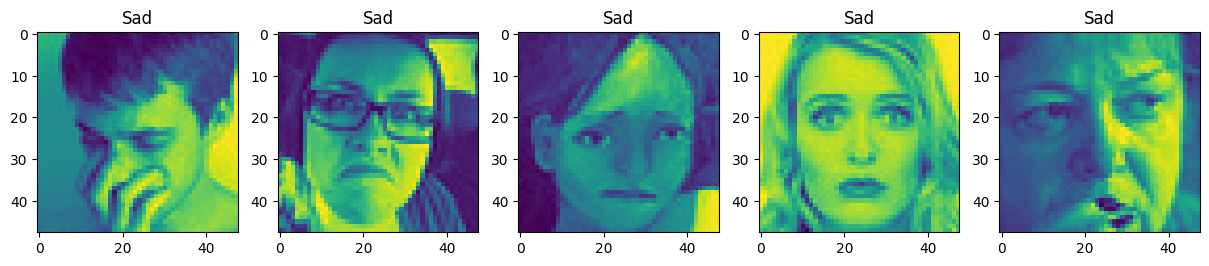

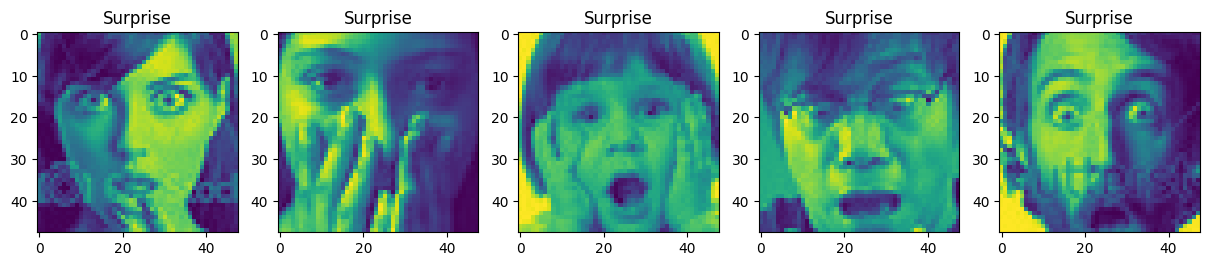

In [6]:
import random

def display_images(folder,label,n=5):
    plt.figure(figsize=(15,3))
    sample_files = random.sample(os.listdir(folder),n)
    for i,img_name in enumerate(sample_files):
        img_path = os.path.join(folder,img_name)
        img = Image.open(img_path)
        plt.subplot(1,n,i+1)
        plt.title(label)
        plt.imshow(img)
    plt.show()
display_images(angry_train,'Angry')
display_images(disgust_train,'Disgust')
display_images(fear_train,'Fear')
display_images(happy_train,'Happy')
display_images(neutral_train,'Neutral')
display_images(sad_train,'Sad')
display_images(surprise_train,'Surprise')  

In [7]:
IMAGE_SIZE = (48, 48)
BATCH_SIZE = 64
COLOR_MODE = "grayscale"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(
    rescale=1./255
)

2025-12-30 16:38:13.644981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767112693.821894      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767112693.877340      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767112694.315086      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767112694.315130      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767112694.315132      24 computation_placer.cc:177] computation placer alr

In [9]:
train_data = train_gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode=COLOR_MODE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_data = val_gen.flow_from_directory(
    validation_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode=COLOR_MODE,
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Activation, Dropout, Dense, GlobalAveragePooling2D


In [11]:
num_classes = 7

model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# Block 4
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# Head
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

I0000 00:00:1767112711.925199      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,030,151 (3.93 MB)

 Trainable params: 1,028,743 (3.92 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [12]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=4,
    min_lr=1e-6
)

In [14]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/50


I0000 00:00:1767112718.408157      84 service.cc:152] XLA service 0x78c620004530 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767112718.408202      84 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1767112719.108048      84 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/451 ━━━━━━━━━━━━━━━━━━━━ 1:17:30 10s/step - accuracy: 0.0781 - loss: 2.8856

I0000 00:00:1767112725.385595      84 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


451/451 ━━━━━━━━━━━━━━━━━━━━ 227s 481ms/step - accuracy: 0.2188 - loss: 1.9621 - val_accuracy: 0.1721 - val_loss: 1.9166 - learning_rate: 1.0000e-04
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.2568 - loss: 1.7918 - val_accuracy: 0.2607 - val_loss: 1.7657 - learning_rate: 1.0000e-04
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 38s 83ms/step - accuracy: 0.2695 - loss: 1.7660 - val_accuracy: 0.3061 - val_loss: 1.7070 - learning_rate: 1.0000e-04
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 38s 85ms/step - accuracy: 0.2890 - loss: 1.7413 - val_accuracy: 0.3302 - val_loss: 1.6799 - learning_rate: 1.0000e-04
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 37s 83ms/step - accuracy: 0.3083 - loss: 1.7087 - val_accuracy: 0.3132 - val_loss: 1.7135 - learning_rate: 1.0000e-04
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.3285 - loss: 1.6733 - val_accuracy: 0.3677 - val_loss: 1.6007 - learning_rate: 1.0000e-04
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accur

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_data.reset()

y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_data.classes

class_names = list(val_data.class_indices.keys())

111/111 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step


In [16]:
print("Classification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
))

Classification Report:

              precision    recall  f1-score   support

       angry     0.4100    0.4677    0.4370       960
     disgust     1.0000    0.0180    0.0354       111
        fear     0.4592    0.1326    0.2058      1018
       happy     0.7669    0.8132    0.7894      1825
     neutral     0.4280    0.7039    0.5323      1216
         sad     0.4786    0.3442    0.4004      1139
    surprise     0.6330    0.7315    0.6787       797

    accuracy                         0.5521      7066
   macro avg     0.5965    0.4587    0.4399      7066
weighted avg     0.5579    0.5521    0.5262      7066



In [17]:
image_size = (224, 224)
input_shape = (224, 224, 3)

In [18]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',   # 🔥 IMPORTANT
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    validation_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [19]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [20]:
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(7, activation='softmax')(x)

model = Model(base_model.input, output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [21]:
model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#model.summary()

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-6
)

In [23]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 330s 172ms/step - accuracy: 0.2304 - loss: 1.8624 - val_accuracy: 0.3406 - val_loss: 1.6789 - learning_rate: 1.0000e-04
Epoch 2/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 291s 162ms/step - accuracy: 0.3211 - loss: 1.7005 - val_accuracy: 0.3665 - val_loss: 1.6297 - learning_rate: 1.0000e-04
Epoch 3/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 288s 160ms/step - accuracy: 0.3519 - loss: 1.6446 - val_accuracy: 0.3864 - val_loss: 1.5991 - learning_rate: 1.0000e-04
Epoch 4/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 293s 163ms/step - accuracy: 0.3658 - loss: 1.6149 - val_accuracy: 0.3917 - val_loss: 1.5824 - learning_rate: 1.0000e-04
Epoch 5/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 289s 160ms/step - accuracy: 0.3652 - loss: 1.6022 - val_accuracy: 0.3961 - val_loss: 1.5701 - learning_rate: 1.0000e-04
Epoch 6/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 287s 159ms/step - accuracy: 0.3769 - loss: 1.5813 - val_accuracy: 0.4048 - val_loss: 1.5588 - learning_rate: 1.0000e-04
Epoch 7/30
1802/1802 ━━━━━━━

In [24]:
val_data.reset()

y_pred_probs2 = model.predict(val_data)
y_pred2 = np.argmax(y_pred_probs2, axis=1)
y_true2 = val_data.classes

class_names2 = list(val_data.class_indices.keys())

442/442 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step


In [25]:
print("EfficientNetB0 Classification Report:\n")
print(classification_report(
    y_true2,
    y_pred2,
    target_names=class_names2,
    digits=4
))

EfficientNetB0 Classification Report:

              precision    recall  f1-score   support

       angry     0.3743    0.1365    0.2000       960
     disgust     0.0000    0.0000    0.0000       111
        fear     0.3646    0.1375    0.1997      1018
       happy     0.4739    0.7315    0.5752      1825
     neutral     0.4140    0.3980    0.4059      1216
         sad     0.3217    0.4943    0.3898      1139
    surprise     0.6208    0.4642    0.5312       797

    accuracy                         0.4278      7066
   macro avg     0.3670    0.3374    0.3288      7066
weighted avg     0.4189    0.4278    0.3971      7066



# Fine-Tunning the EfficientNetB0

In [26]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

class_weights = dict(enumerate(class_weights))

In [27]:
import tensorflow as tf

base_model.trainable = True

# Freeze BN layers
for layer in base_model.layers:
    if isinstance(layer,tf.keras.layers.BatchNormalization):
        layer.trainable = False

# Progressive unfreeze
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(5e-6),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, lr_reduce],
    class_weight=class_weights
)


Epoch 1/20


2025-12-30 19:29:02.098681: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-30 19:29:02.283596: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-30 19:29:02.709077: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-30 19:29:02.913597: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-30 19:29:03.258778: E external/local_xla/xla/stream_

 422/1802 ━━━━━━━━━━━━━━━━━━━━ 3:47 165ms/step - accuracy: 0.2874 - loss: 1.7998

2025-12-30 19:30:37.345906: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-30 19:30:37.530459: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-30 19:30:37.916063: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-30 19:30:38.120460: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1802/1802 ━━━━━━━━━━━━━━━━━━━━ 388s 188ms/step - accuracy: 0.3107 - loss: 1.7809 - val_accuracy: 0.3746 - val_loss: 1.6956 - learning_rate: 5.0000e-06
Epoch 2/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 302s 168ms/step - accuracy: 0.3841 - loss: 1.6463 - val_accuracy: 0.4663 - val_loss: 1.5427 - learning_rate: 5.0000e-06
Epoch 3/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 301s 167ms/step - accuracy: 0.4301 - loss: 1.5750 - val_accuracy: 0.5018 - val_loss: 1.4766 - learning_rate: 5.0000e-06
Epoch 4/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 302s 168ms/step - accuracy: 0.4564 - loss: 1.5310 - val_accuracy: 0.5256 - val_loss: 1.4352 - learning_rate: 5.0000e-06
Epoch 5/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 301s 167ms/step - accuracy: 0.4802 - loss: 1.4916 - val_accuracy: 0.5365 - val_loss: 1.4058 - learning_rate: 5.0000e-06
Epoch 6/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 303s 168ms/step - accuracy: 0.4882 - loss: 1.4608 - val_accuracy: 0.5565 - val_loss: 1.3707 - learning_rate: 5.0000e-06
Epoch 7/20
1802/1802 ━━━━━━━━━━━━━━━━━━

In [28]:
val_data.reset()

fine_y_pred_probs = model.predict(val_data)
y_pred_fine = np.argmax(y_pred_probs2, axis=1)
y_true_fine = val_data.classes

class_names = list(val_data.class_indices.keys())

print("Fine-Tuned EfficientNetB0 Classification Report:\n")
print(classification_report(
    y_true_fine,
    y_pred_fine,
    target_names=class_names,
    digits=4
))

442/442 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step
Fine-Tuned EfficientNetB0 Classification Report:

              precision    recall  f1-score   support

       angry     0.3743    0.1365    0.2000       960
     disgust     0.0000    0.0000    0.0000       111
        fear     0.3646    0.1375    0.1997      1018
       happy     0.4739    0.7315    0.5752      1825
     neutral     0.4140    0.3980    0.4059      1216
         sad     0.3217    0.4943    0.3898      1139
    surprise     0.6208    0.4642    0.5312       797

    accuracy                         0.4278      7066
   macro avg     0.3670    0.3374    0.3288      7066
weighted avg     0.4189    0.4278    0.3971      7066

